In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

In [2]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [3]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [4]:
feat_file.shape

(2129, 3200)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 3200)

In [10]:
X_train_filtered=pd.read_csv('min_acqui_20(10)_train.csv')

In [11]:
X_train_filtered.head()

,C1_105,B5_106,E3_56,B1_16,B5_9,C5_81,C4_50,B1_125,E5_20,A1_57
0,0.168730,0.149829,0.301257,0.334682,0.197676,0.642825,0.829659,0.401854,0.229261,0.871392
1,0.128466,0.616915,0.633823,0.493317,0.150770,0.780629,0.233263,0.672113,0.504131,0.127748
2,0.403856,0.159859,0.859782,0.107324,0.715680,0.690129,0.313706,0.370212,0.514947,0.907899
3,0.478226,0.235789,0.755887,0.439276,0.179501,0.881382,0.309607,0.198907,0.808675,0.895637
4,0.265481,0.586934,0.338353,0.331117,0.594272,0.698586,0.290308,0.409121,0.851157,0.894762


In [12]:
X_test_filtered=pd.read_csv('min_acqui_20(10)_test.csv')

In [13]:
X_test_filtered.head()

,C1_105,B5_106,E3_56,B1_16,B5_9,C5_81,C4_50,B1_125,E5_20,A1_57
0,0.113438,0.471283,0.847360,0.519765,0.713113,0.752180,0.227426,0.489513,0.473774,0.133677
1,0.160236,0.133839,0.653202,0.398911,0.548880,0.780802,0.194413,0.329191,0.247706,0.884547
2,0.530444,0.504593,0.159903,0.651806,0.969173,0.749182,0.238075,0.597877,0.348038,0.797139
3,0.175571,0.143250,0.738228,0.465893,0.644827,0.756456,0.319517,0.734036,0.724904,0.903582
4,0.484406,0.275574,0.518020,0.351686,0.771056,0.681310,0.285426,0.441768,0.738571,0.882518


## RFC

In [14]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values=forest.predict_proba(X_test_filtered)

In [15]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[123  76]
 [ 85 142]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5913    0.6181    0.6044       199
           1     0.6514    0.6256    0.6382       227

    accuracy                         0.6221       426
   macro avg     0.6214    0.6218    0.6213       426
weighted avg     0.6233    0.6221    0.6224       426



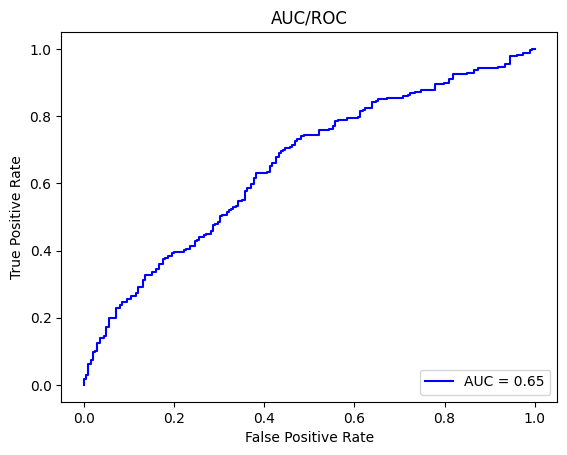

In [16]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)
y_prediction_values=KNN.predict_proba(X_test_filtered)

In [18]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa=knn_kappa_train
knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[108  91]
 [ 75 152]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5902    0.5427    0.5654       199
           1     0.6255    0.6696    0.6468       227

    accuracy                         0.6103       426
   macro avg     0.6078    0.6062    0.6061       426
weighted avg     0.6090    0.6103    0.6088       426



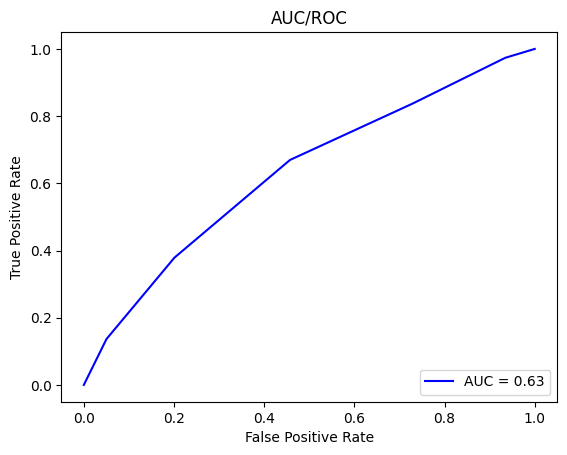

In [19]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [20]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)
y_prediction_values=model.predict_proba(X_test_filtered)

In [21]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
svc_kappa=knn_kappa_train
svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
svc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[100  99]
 [ 73 154]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5780    0.5025    0.5376       199
           1     0.6087    0.6784    0.6417       227

    accuracy                         0.5962       426
   macro avg     0.5934    0.5905    0.5897       426
weighted avg     0.5944    0.5962    0.5931       426



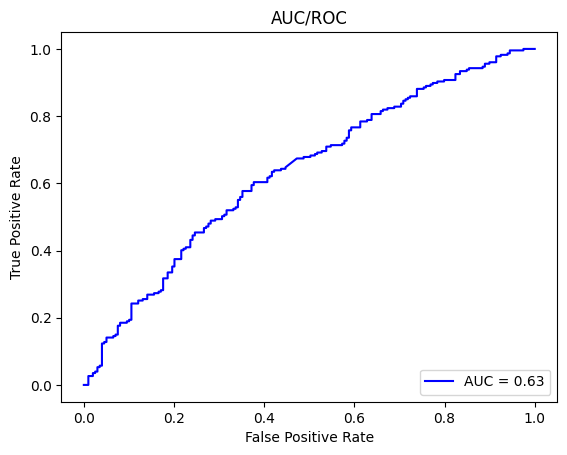

In [22]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)
y_prediction_values=lr.predict_proba(X_test_filtered)

In [24]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lr_kappa=knn_kappa_train
lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lr_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[102  97]
 [ 65 162]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6108    0.5126    0.5574       199
           1     0.6255    0.7137    0.6667       227

    accuracy                         0.6197       426
   macro avg     0.6181    0.6131    0.6120       426
weighted avg     0.6186    0.6197    0.6156       426



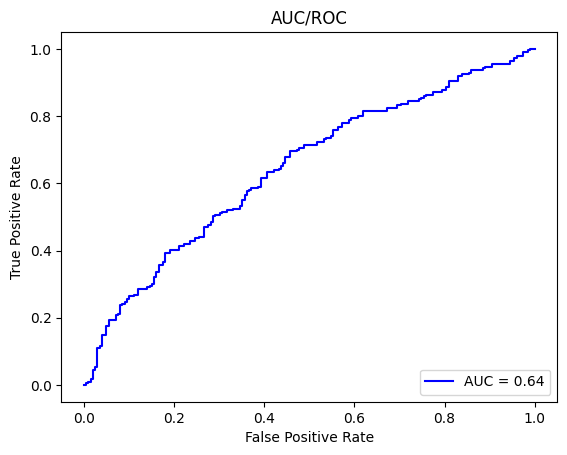

In [25]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values=xgb.predict_proba(X_test_filtered)

[11:33:13] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [27]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)
xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
xgb_kappa=knn_kappa_train
xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
xgb_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[117  82]
 [ 82 145]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5879    0.5879    0.5879       199
           1     0.6388    0.6388    0.6388       227

    accuracy                         0.6150       426
   macro avg     0.6134    0.6134    0.6134       426
weighted avg     0.6150    0.6150    0.6150       426



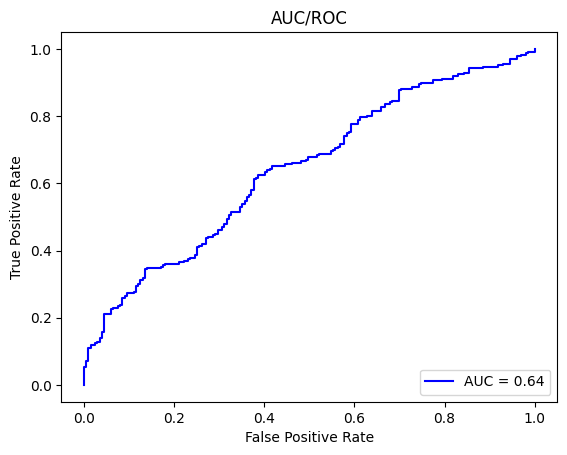

In [28]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values=clf.predict_proba(X_test_filtered)

In [30]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
clf_kappa=knn_kappa_train
clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
clf_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 83 116]
 [ 63 164]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5685    0.4171    0.4812       199
           1     0.5857    0.7225    0.6469       227

    accuracy                         0.5798       426
   macro avg     0.5771    0.5698    0.5641       426
weighted avg     0.5777    0.5798    0.5695       426



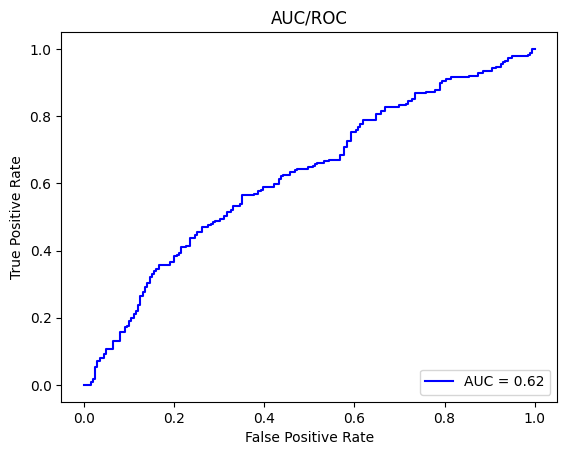

In [31]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values=mlp.predict_proba(X_test_filtered)

In [33]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)
mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
mlp_kappa=knn_kappa_train
mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
mlp_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[107  92]
 [ 68 159]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6114    0.5377    0.5722       199
           1     0.6335    0.7004    0.6653       227

    accuracy                         0.6244       426
   macro avg     0.6224    0.6191    0.6187       426
weighted avg     0.6232    0.6244    0.6218       426



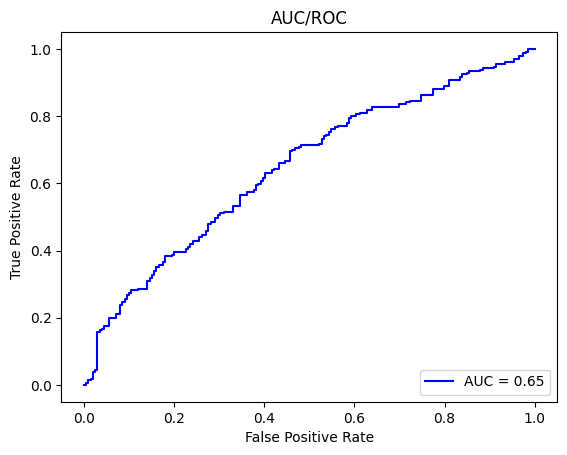

In [34]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values=etc.predict_proba(X_test_filtered)

In [36]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)
etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
etc_kappa=knn_kappa_train
etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
etc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[115  84]
 [ 79 148]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5928    0.5779    0.5852       199
           1     0.6379    0.6520    0.6449       227

    accuracy                         0.6174       426
   macro avg     0.6154    0.6149    0.6151       426
weighted avg     0.6168    0.6174    0.6170       426



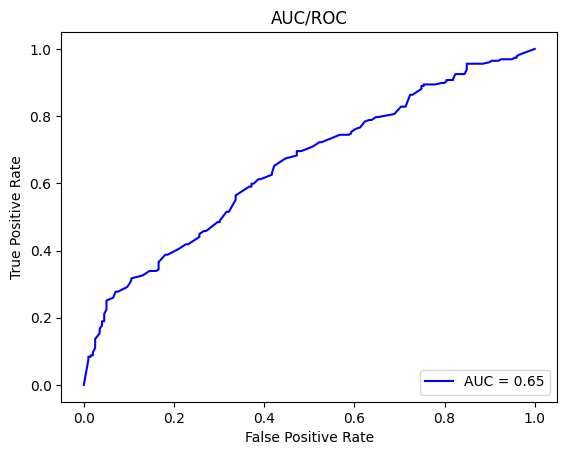

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [38]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)
y_prediction_values=dtc.predict_proba(X_test_filtered)
                            

In [39]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)
dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
dtc_kappa=knn_kappa_train
dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
dtc_kappa=knn_kappa_test
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[137  62]
 [113 114]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5480    0.6884    0.6102       199
           1     0.6477    0.5022    0.5658       227

    accuracy                         0.5892       426
   macro avg     0.5979    0.5953    0.5880       426
weighted avg     0.6011    0.5892    0.5865       426



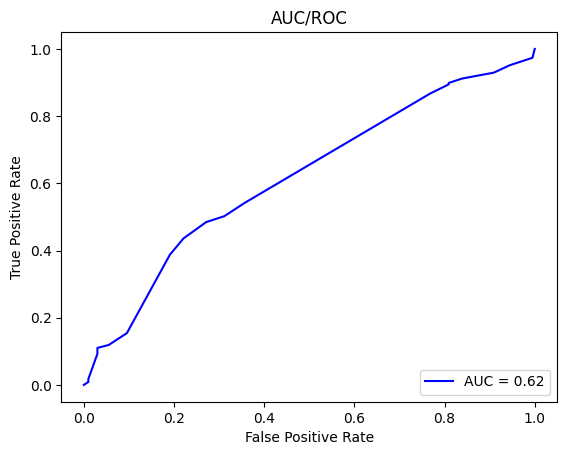

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)
y_prediction_values=lda.predict_proba(X_test_filtered)
                            

In [42]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)
lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lda_kappa=knn_kappa_train
lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lda_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 99 100]
 [ 65 162]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6037    0.4975    0.5455       199
           1     0.6183    0.7137    0.6626       227

    accuracy                         0.6127       426
   macro avg     0.6110    0.6056    0.6040       426
weighted avg     0.6115    0.6127    0.6079       426



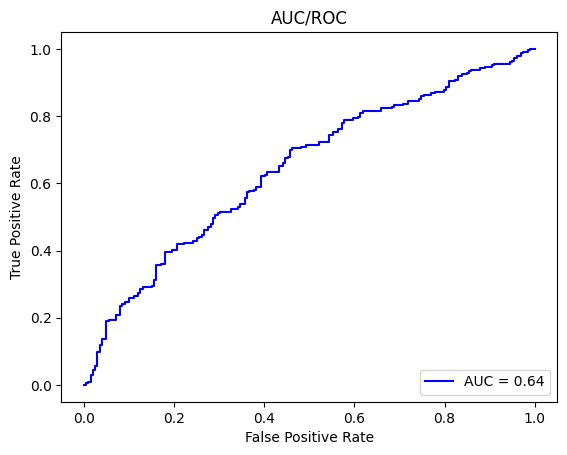

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [44]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
df_train = pd.DataFrame(data_train)

In [45]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa],
               'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
             
             
df_test = pd.DataFrame(data_test)             

In [46]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC
0,RFC,73.458602,0.469400,0.734529,0.749706,0.727480,0.469181,0.654772
1,KNN,74.633001,0.492139,0.746065,0.752554,0.755986,0.492133,0.632026
2,SVC,67.938931,0.359026,0.676201,0.666332,0.755986,0.355526,0.633586
3,LR,63.887258,0.277691,0.633719,0.627432,0.735462,0.273234,0.643747
4,XGB,98.179683,0.963560,0.981780,0.981777,0.982896,0.963560,0.642552
5,GNB,61.773341,0.237695,0.606798,0.601802,0.761688,0.228452,0.622739
6,MLP,64.004698,0.279641,0.635606,0.630178,0.728620,0.275956,0.645828
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.653156
8,DTC,68.761010,0.382895,0.686755,0.734057,0.616876,0.377726,0.618721
9,LDA,64.122137,0.282957,0.635465,0.627885,0.744584,0.277654,0.643836


In [47]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC
0,RFC,62.206573,0.243181,0.621312,0.651376,0.625551,0.242963,0.654772
1,KNN,61.032864,0.213991,0.606127,0.625514,0.669604,0.213375,0.632026
2,SVC,59.624413,0.183806,0.589651,0.608696,0.678414,0.182396,0.633586
3,LR,61.971831,0.231186,0.612022,0.625483,0.713656,0.228485,0.643747
4,XGB,61.502347,0.226706,0.613353,0.638767,0.638767,0.226706,0.642552
5,GNB,57.981221,0.146697,0.564051,0.585714,0.722467,0.141883,0.622739
6,MLP,62.441315,0.241488,0.618732,0.633466,0.700441,0.239913,0.645828
7,ETC,61.737089,0.230293,0.615061,0.637931,0.651982,0.230229,0.653156
8,DTC,58.920188,0.193169,0.588001,0.647727,0.502203,0.187678,0.618721
9,LDA,61.267606,0.216494,0.604016,0.618321,0.713656,0.213375,0.643836
